In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

process_script_name = 'p19_process_first_5years.py'
print('Sending processing script ' + process_script_name + ' to raijin...')
os.system('scp ' + process_script_name + ' erd561@raijin.nci.org.au:~/CMIP5/.')
print('Done. Now the script must be run by logging into raijin and using:')
print('$ python CMIP5/' + process_script_name)


Figures will be saved in: /Users/earl/Dropbox/CMIP5/figures/p20_check_first_5years

Sending processing script p19_process_first_5years.py to raijin...
Done. Now the script must be run by logging into raijin and using:
$ python CMIP5/p19_process_first_5years.py


In [48]:
remote_domain = 'erd561@raijin.nci.org.au:'
remote_path = '/g/data/e14/erd561/R8exp/gfdl_nyf_1080_hist/first_5years/'
local_path = '/Users/earl/Desktop/alamanda/'
os.system('sshfs ' +
          remote_domain +
          remote_path + ' ' +
          local_path)


remote_domain2 = 'erd561@raijin.nci.org.au:'
remote_path2 = '/g/data/e14/erd561/R8exp/gfdl_nyf_1080/'
local_path2 = '/Users/earl/Desktop/bamboo/'
os.system('sshfs ' +
          remote_domain2 +
          remote_path2 + ' ' +
          local_path2)

0

In [51]:
file_names = ['ice_month', 'ocean_month', 'ocean_month', 
              'ocean_month', 'ocean_month', 'ocean_month', 'ocean_month']
var_names = ['SST', 'net_sfc_heating', 'tau_x', 'tau_y', 
             'tau_curl', 'ekman_we', 'ekman_heat']
data_names = ['SST', 'nsh', 'tau_x', 'tau_y', 'tau_curl', 'ekman_we', 'ekman_heat']
x_names = ['xt', 'xt_ocean', 'xu_ocean', 'xu_ocean', 'xt_ocean', 'xt_ocean', 'xt_ocean']
y_names = ['yt', 'yt_ocean', 'yu_ocean', 'yu_ocean', 'yu_ocean', 'yu_ocean', 'yu_ocean']

data = {}
x = {}
y = {}
for f,v,d,xx,yy in zip(file_names, var_names, data_names, x_names, y_names):
    print('Loading ' + d)
    data[d] = xr.open_dataset(
        local_path + f + '_' + d + '.nc', decode_times=False)[v]
    x[d] = xr.open_dataset(
        local_path + f + '_' + d + '.nc', decode_times=False)[xx]
    y[d] = xr.open_dataset(
        local_path + f + '_' + d + '.nc', decode_times=False)[yy]
    
print(x['SST'])

SST_ctrl = xr.open_dataset(
    local_path2 + 'ice_month_ncra_SST.nc', 
    decode_times=False)['SST'][0,:,:]

Loading SST
Loading nsh
Loading tau_x
Loading tau_y
Loading tau_curl
Loading ekman_we
Loading ekman_heat
<xarray.DataArray 'xt' (xt: 1440)>
array([-279.875, -279.625, -279.375, ...,   79.375,   79.625,   79.875])
Coordinates:
  * xt       (xt) float64 -279.9 -279.6 -279.4 -279.1 -278.9 -278.6 -278.4 ...
Attributes:
    long_name:       longitude
    units:           degrees_E
    cartesian_axis:  X
    edges:           xb


(1080, 1440)
(1080, 1440)
(1080, 1440)
(1080, 1440)
(1080, 1440)


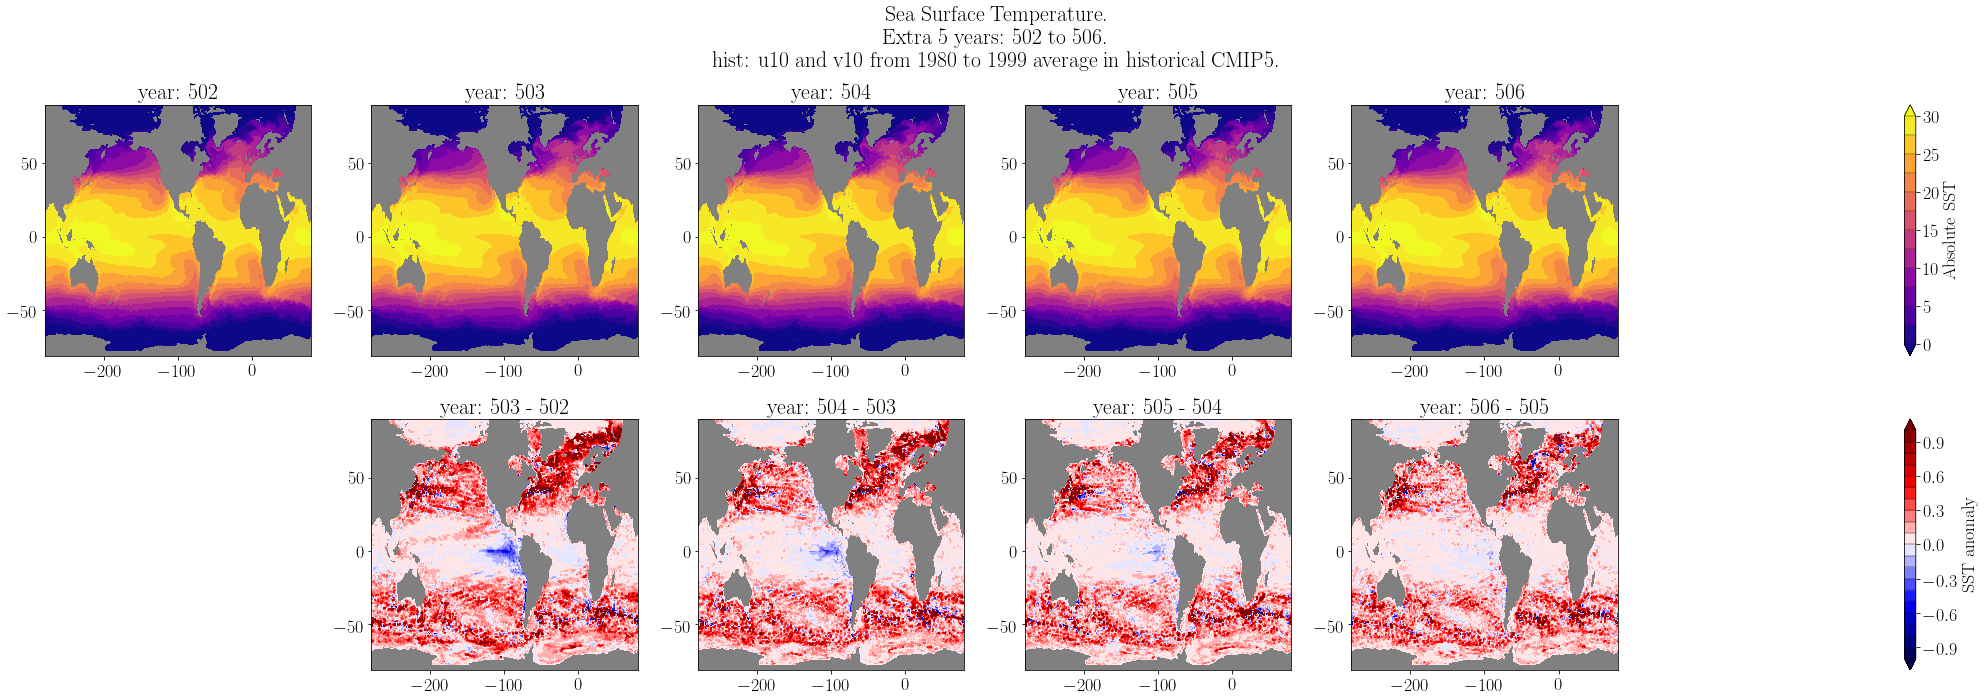

In [33]:
matplotlib.rcParams.update({'font.size': 18}) 
row = 2
col = 6
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(28, 10)

plt.suptitle('Sea Surface Temperature.\n'
            + 'Extra 5 years: 502 to 506.\n'
            + 'hist: u10 and v10 from 1980 to 1999 average in historical CMIP5.')


for t in np.arange(5):
    print(np.shape(data['SST'][0,:,:]))
    cmap = plt.get_cmap('plasma')
    step = 2.5
    contf_lvls = np.arange(0,30+1e-08,step)  
    ax = plt.subplot2grid((row, col), (0, t))
    ax.set_facecolor('grey')
    contf = plt.contourf(x['SST'], y['SST'], data['SST'][t,:,:], contf_lvls, cmap=cmap, extend='both')
    ax.set_title('year: 50' + str(t+2))
    
    if t == 4:
        ax = plt.subplot2grid((row, col), (0, 5))
        cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
        cbar.set_label(r'Absolute SST') 
        plt.axis('off')
    
    if t > 0:
        cmap = plt.get_cmap('seismic')
        step = 0.1
        contf_lvls = np.arange(-1,1+1e-08,step)  
        ax = plt.subplot2grid((row, col), (1, t))
        ax.set_facecolor('grey')
        contf = plt.contourf(x['SST'], y['SST'], data['SST'][t,:,:]-data['SST'][t-1,:,:], contf_lvls, cmap=cmap, extend='both')
        ax.set_title('year: 50' + str(t+2) + ' - 50' + str(t+1))
        
    if t == 4:
        ax = plt.subplot2grid((row, col), (1, 5))
        cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
        cbar.set_label(r'SST anomaly') 
        plt.axis('off')

fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=200)

(1080, 1440)
(1080, 1440)
(1080, 1440)
(1080, 1440)
(1080, 1440)


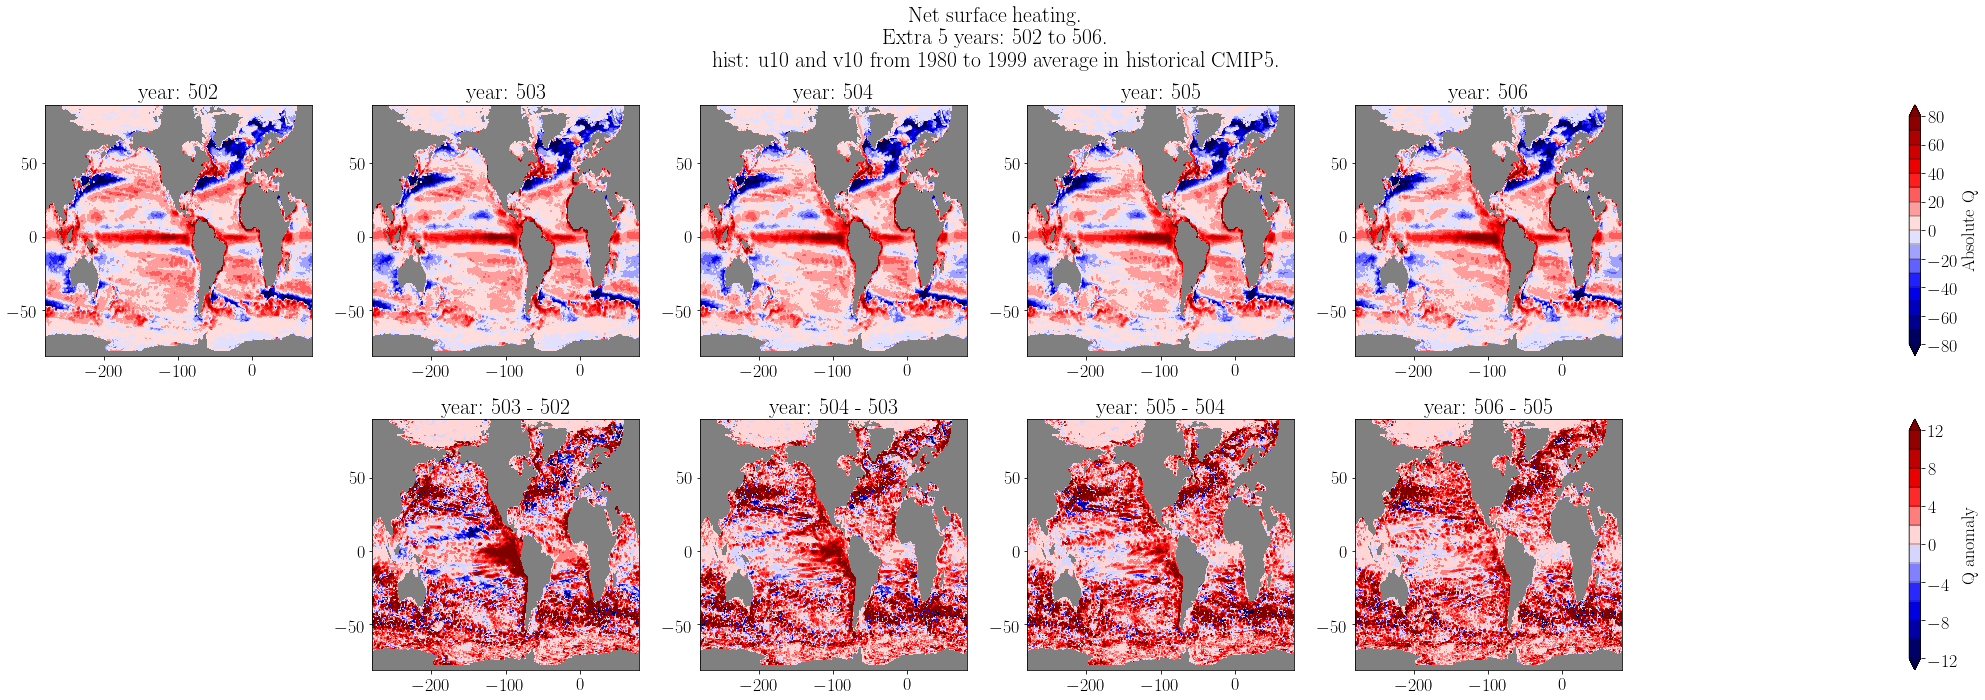

In [35]:
matplotlib.rcParams.update({'font.size': 18}) 
row = 2
col = 6
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(28, 10)

plt.suptitle('Net surface heating.\n'
            + 'Extra 5 years: 502 to 506.\n'
            + 'hist: u10 and v10 from 1980 to 1999 average in historical CMIP5.')


for t in np.arange(5):
    print(np.shape(data['nsh'][0,:,:]))
    cmap = plt.get_cmap('seismic')
    step = 10
    contf_lvls = np.arange(-80,80+1e-08,step)   
    ax = plt.subplot2grid((row, col), (0, t))
    ax.set_facecolor('grey')
    contf = plt.contourf(x['nsh'], y['nsh'], data['nsh'][t,:,:], contf_lvls, cmap=cmap, extend='both')
    ax.set_title('year: 50' + str(t+2))
    
    if t == 4:
        ax = plt.subplot2grid((row, col), (0, 5))
        cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
        cbar.set_label(r'Absolute Q') 
        plt.axis('off')
    
    if t > 0:
        cmap = plt.get_cmap('seismic')
        step = 2
        contf_lvls = np.arange(-12,12+1e-08,step)   
        ax = plt.subplot2grid((row, col), (1, t))
        ax.set_facecolor('grey')
        contf = plt.contourf(x['nsh'], y['nsh'], data['nsh'][t,:,:]-data['nsh'][t-1,:,:], contf_lvls, cmap=cmap, extend='both')
        ax.set_title('year: 50' + str(t+2) + ' - 50' + str(t+1))
        
    if t == 4:
        ax = plt.subplot2grid((row, col), (1, 5))
        cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
        cbar.set_label(r'Q anomaly') 
        plt.axis('off')

fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig2_' + '.png', bbox_inches='tight', dpi=200)

(1080, 1440)
(1080, 1440)
(1080, 1440)
(1080, 1440)
(1080, 1440)


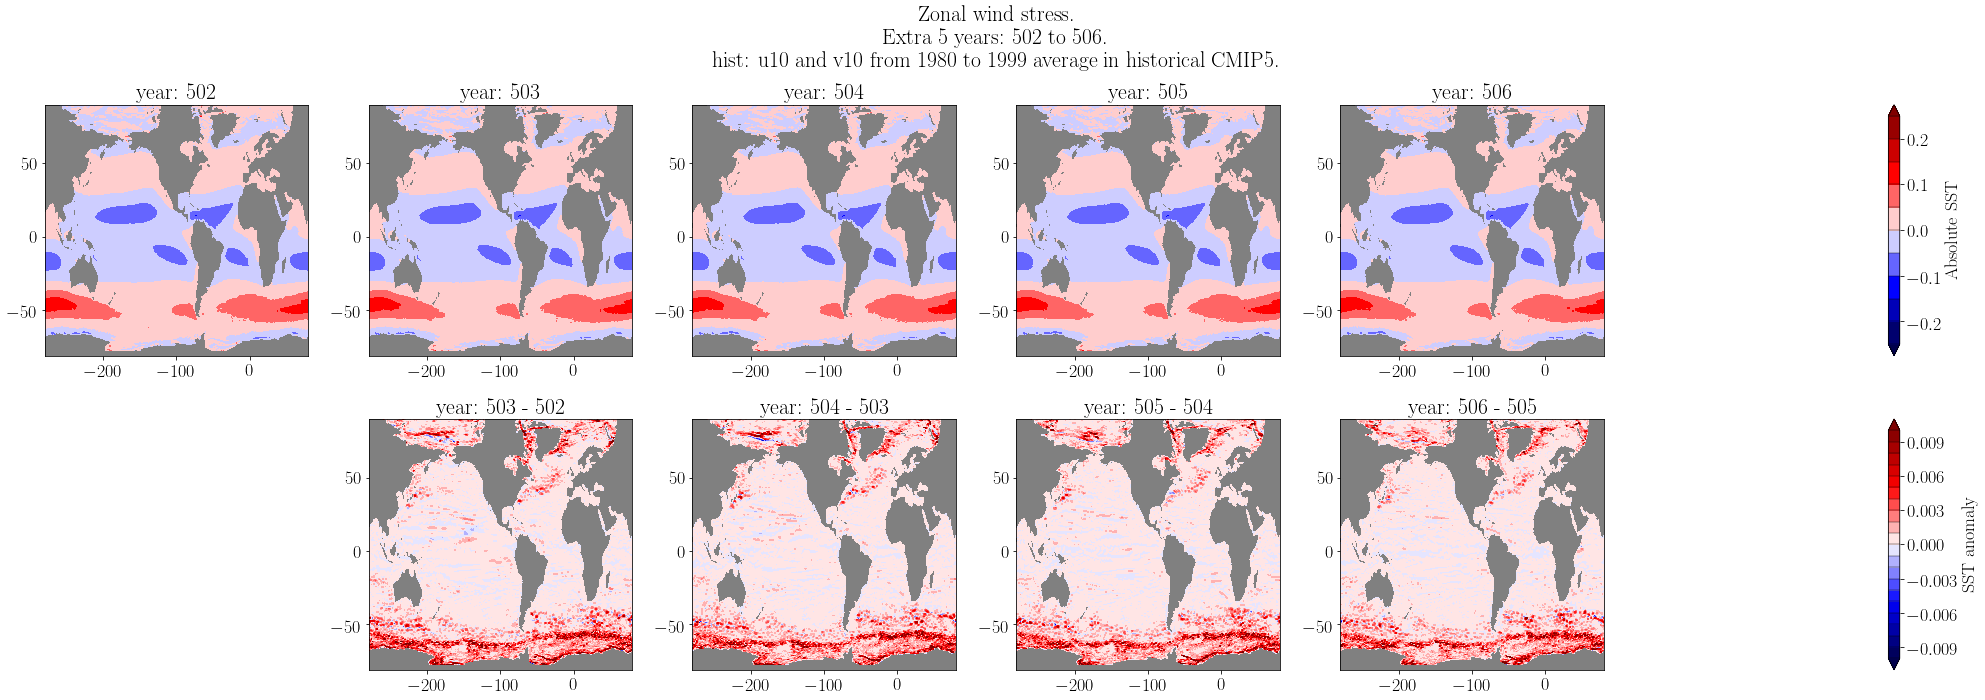

In [37]:
matplotlib.rcParams.update({'font.size': 18}) 
row = 2
col = 6
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(28, 10)

plt.suptitle('Zonal wind stress.\n'
            + 'Extra 5 years: 502 to 506.\n'
            + 'hist: u10 and v10 from 1980 to 1999 average in historical CMIP5.')


for t in np.arange(5):
    print(np.shape(data['tau_x'][0,:,:]))
    cmap = plt.get_cmap('seismic')
    step = 0.05
    contf_lvls = np.arange(-0.25,0.25+1e-08,step)   
    ax = plt.subplot2grid((row, col), (0, t))
    ax.set_facecolor('grey')
    contf = plt.contourf(x['tau_x'], y['tau_x'], data['tau_x'][t,:,:], contf_lvls, cmap=cmap, extend='both')
    ax.set_title('year: 50' + str(t+2))
    
    if t == 4:
        ax = plt.subplot2grid((row, col), (0, 5))
        cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
        cbar.set_label(r'Absolute tau x') 
        plt.axis('off')
    
    if t > 0:
        cmap = plt.get_cmap('seismic')
        step = 0.001
        contf_lvls = np.arange(-0.01,0.01+1e-08,step)   
        ax = plt.subplot2grid((row, col), (1, t))
        ax.set_facecolor('grey')
        contf = plt.contourf(
            x['tau_x'], y['tau_x'], data['tau_x'][t,:,:]-data['tau_x'][t-1,:,:], 
            contf_lvls, cmap=cmap, extend='both')
        ax.set_title('year: 50' + str(t+2) + ' - 50' + str(t+1))
        
    if t == 4:
        ax = plt.subplot2grid((row, col), (1, 5))
        cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
        cbar.set_label(r'tau x anomaly') 
        plt.axis('off')

fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig3_' + '.png', bbox_inches='tight', dpi=200)

(1080, 1440)
(1080, 1440)
(1080, 1440)
(1080, 1440)
(1080, 1440)


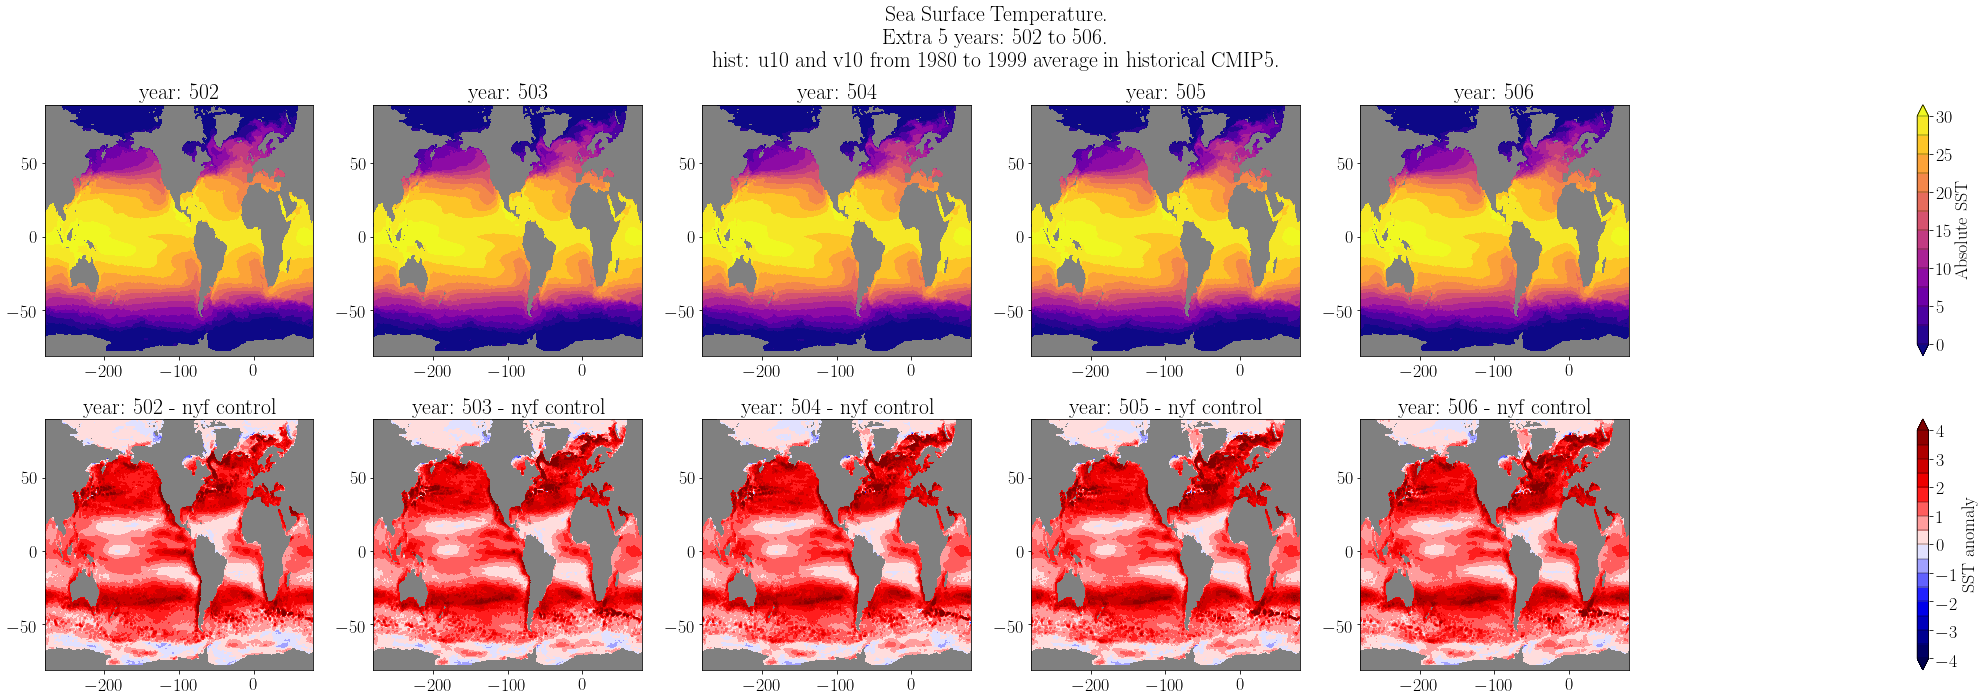

In [55]:
matplotlib.rcParams.update({'font.size': 18}) 
row = 2
col = 6
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(28, 10)

plt.suptitle('Sea Surface Temperature.\n'
            + 'Extra 5 years: 502 to 506.\n'
            + 'hist: u10 and v10 from 1980 to 1999 average in historical CMIP5.')


for t in np.arange(5):
    print(np.shape(data['SST'][0,:,:]))
    cmap = plt.get_cmap('plasma')
    step = 2.5
    contf_lvls = np.arange(0,30+1e-08,step)  
    ax = plt.subplot2grid((row, col), (0, t))
    ax.set_facecolor('grey')
    contf = plt.contourf(x['SST'], y['SST'], data['SST'][t,:,:], contf_lvls, cmap=cmap, extend='both')
    ax.set_title('year: 50' + str(t+2))
    
    if t == 4:
        ax = plt.subplot2grid((row, col), (0, 5))
        cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
        cbar.set_label(r'Absolute SST') 
        plt.axis('off')
    
    cmap = plt.get_cmap('seismic')
    step = 0.5
    contf_lvls = np.arange(-4,4+1e-08,step)  
    ax = plt.subplot2grid((row, col), (1, t))
    ax.set_facecolor('grey')
    contf = plt.contourf(x['SST'], y['SST'], data['SST'][t,:,:]-SST_ctrl, 
                         contf_lvls, cmap=cmap, extend='both')
    ax.set_title('year: 50' + str(t+2) + ' - nyf control')
        
    if t == 4:
        ax = plt.subplot2grid((row, col), (1, 5))
        cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
        cbar.set_label(r'SST anomaly') 
        plt.axis('off')

fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig4_' + '.png', bbox_inches='tight', dpi=200)